In [1]:
####
## Celso Antonio Uliana Junior
## July 9 2020
####
import pandas as pd

data_raw_covid = pd.read_csv("C:/Users/PCDOMILHAO/Documents/GitHub/trab-siad/scripts/Python/Jupyter/dados/covidBrasil.csv", sep = ";", decimal = ",")
data_raw_isolation = pd.read_csv("C:/Users/PCDOMILHAO/Documents/GitHub/trab-siad/scripts/Python/Jupyter/dados/isolamento.csv", sep = ";", decimal = ",")
data_covid = data_raw_covid['Data'].values.copy()
data_covid = data_raw_covid.dropna().set_index("Data")
data_isolation = data_raw_isolation['Data'].values.copy()
data_isolation = data_raw_isolation.dropna().set_index("Data")

data = data_covid

data['Taxa'] = data_isolation['Taxa'].values.copy()

print(len(data))

117


In [2]:
from sklearn.preprocessing import MinMaxScaler

####
## normalizing values for both covid and isolation percentage 
## between range [0,1] using sklearn MinMaxScaler
####

covid_norm = data_covid["Casos"].values.copy()
covid_norm.shape = (len(covid_norm), 1)

isolation_norm = data_isolation["Taxa"].values.copy()
isolation_norm.shape = (len(isolation_norm), 1)

####
## Shaping the central dataFrame with normalized values
####
min_max_scaler = MinMaxScaler()

covid_norm = min_max_scaler.fit_transform(covid_norm)
isolation_norm = min_max_scaler.fit_transform(isolation_norm)

data["CasosNormalizados"] = covid_norm
data["TaxasNormalizadas"] = isolation_norm

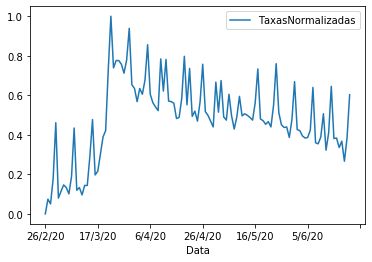

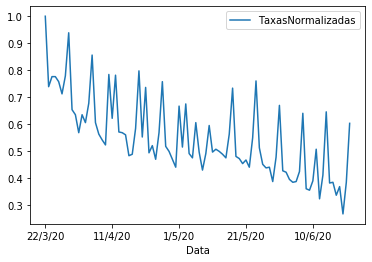

In [3]:
####
## Ploting the graph
####
data_shorter = data[25:]

import matplotlib.pyplot as plt
data.plot(y=['TaxasNormalizadas'])

data_shorter.plot(y=['TaxasNormalizadas'])
plt.show()

In [4]:
####
## Calculating Pearson correlation 
####

import numpy
from scipy.stats import pearsonr
arrTaxa = data['TaxasNormalizadas'].values.copy()
arrCasos = data['CasosNormalizados'].values.copy()
arrTaxa_shorter = data_shorter['TaxasNormalizadas'].values.copy()
arrCasos_shorter = data_shorter['CasosNormalizados'].values.copy()
print(pearsonr(arrTaxa, arrCasos))
print(pearsonr(arrTaxa_shorter, arrCasos_shorter))

(-0.03892879028152567, 0.6768859337467233)
(-0.5529001182672568, 1.097711128710997e-08)
